In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [88]:
raw_data = pd.read_excel("long_answer/training_set_rel3.xls")

In [89]:
raw_data.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'],
      dtype='object')

In [90]:
raw_data.dtypes

essay_id            int64
essay_set           int64
essay              object
rater1_domain1    float64
rater2_domain1    float64
rater3_domain1    float64
domain1_score     float64
rater1_domain2    float64
rater2_domain2    float64
domain2_score     float64
rater1_trait1     float64
rater1_trait2     float64
rater1_trait3     float64
rater1_trait4     float64
rater1_trait5     float64
rater1_trait6     float64
rater2_trait1     float64
rater2_trait2     float64
rater2_trait3     float64
rater2_trait4     float64
rater2_trait5     float64
rater2_trait6     float64
rater3_trait1     float64
rater3_trait2     float64
rater3_trait3     float64
rater3_trait4     float64
rater3_trait5     float64
rater3_trait6     float64
dtype: object

In [91]:
raw_data.shape

(12978, 28)

In [92]:
raw_data.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
raw_data.tail()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
12973,21626,8,In most stories mothers and daughters are eit...,17.0,18.0,NaN,35.0,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12974,21628,8,I never understood the meaning laughter is th...,15.0,17.0,NaN,32.0,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20.0,26.0,40.0,40.0,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12976,21630,8,Trippin' on fen...,20.0,20.0,NaN,40.0,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
12977,21633,8,Many people believe that laughter can improve...,20.0,20.0,NaN,40.0,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
raw_data['essay_length'] = raw_data.essay.apply(lambda essay: len(essay))
raw_data['vocab_size'] = raw_data.essay.apply(lambda essay: len(set(essay.split())))
raw_data['lexical_diversity'] = raw_data.essay.apply(lambda essay: len(set(essay.split()))/len(essay))
raw_data['vocabulary'] = raw_data.essay.apply(lambda essay: set(essay.split()))
raw_data['long_words'] = raw_data.vocabulary.apply(lambda vocabulary: len([word for word in vocabulary if len(word) > 7]))

In [140]:
d = dict()
for i in range(1,9):
    d[i] = raw_data[raw_data.essay_set==i]

C:\Users\Beau\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


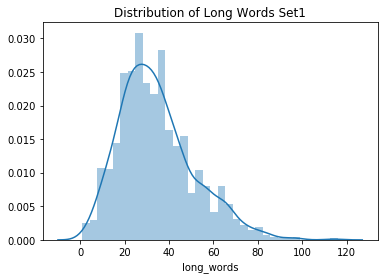

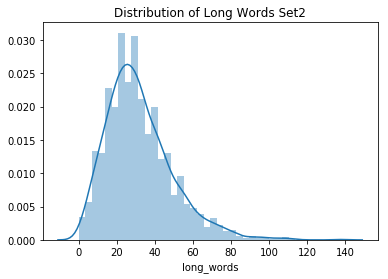

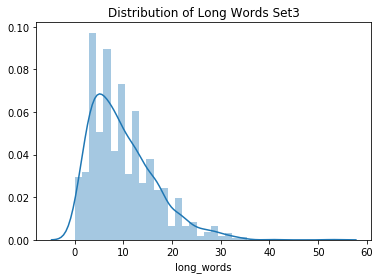

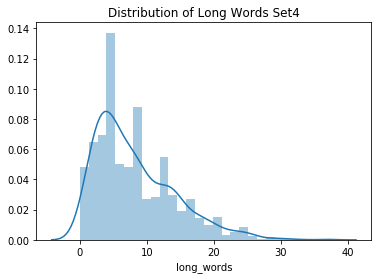

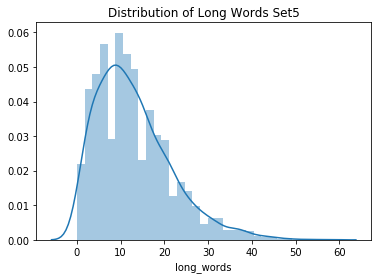

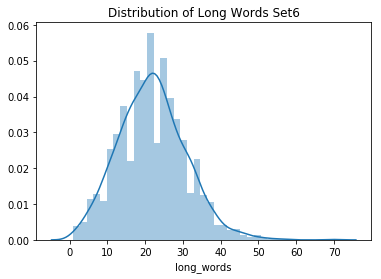

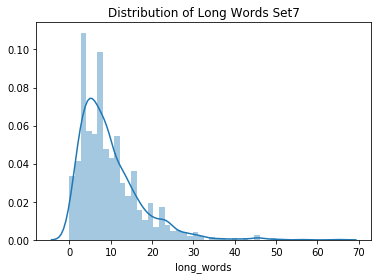

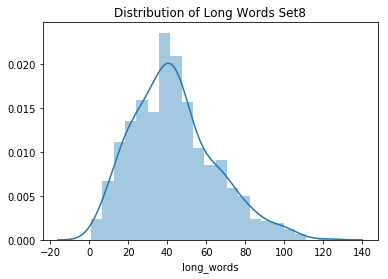

In [141]:
# for i in range(1,9):
#     plt.figure()
#     sns.distplot(d[i].essay_length)
#     plt.title("Distribution of Essay Length Set{}".format(i))
    
# for i in range(1,9):
#     plt.figure()
#     sns.distplot(d[i].vocab_size)
#     plt.title("Distribution of Vocab Size Set{}".format(i))
    
# for i in range(1,9):
#     plt.figure()
#     sns.distplot(d[i].lexical_diversity)
#     plt.title("Distribution of Lexical Diversity Set{}".format(i))

for i in range(1,9):
    plt.figure()
    sns.distplot(d[i].long_words)
    plt.title("Distribution of Long Words Set{}".format(i))

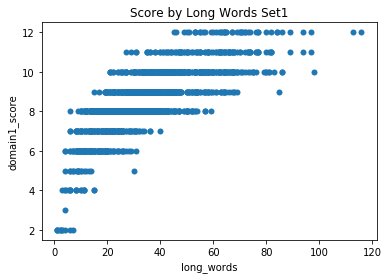

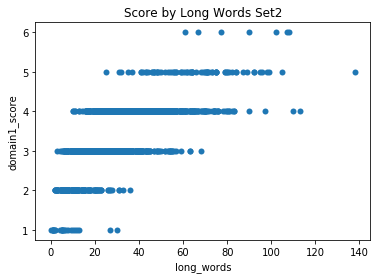

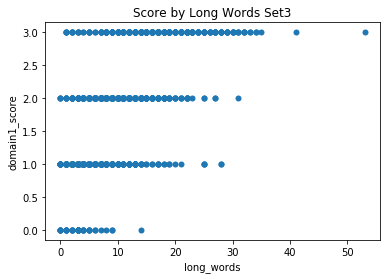

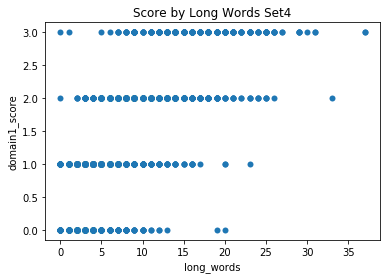

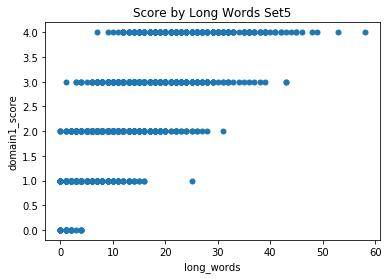

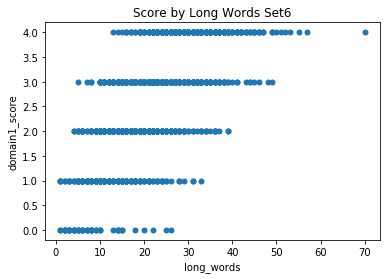

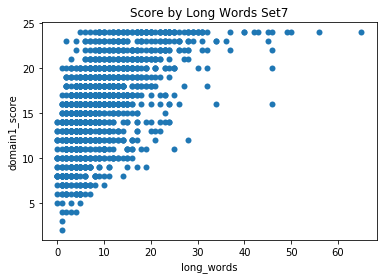

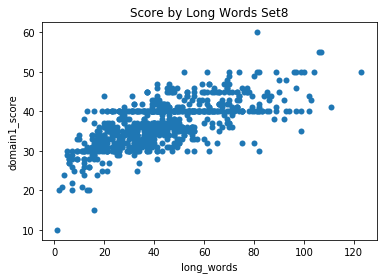

In [148]:
# for i in range(1,9):
#     plt.figure()
#     sns.scatterplot(x="essay_length", y="domain1_score",
#                 sizes=(1, 8), linewidth=0,
#                 data=d[i])
#     plt.title("Score by Length Set{}".format(i))
    
# for i in range(1,9):
#     plt.figure()
#     sns.scatterplot(x="vocab_size", y="domain1_score",
#                 sizes=(1, 8), linewidth=0,
#                 data=d[i])
#     plt.title("Score by Vocab Size Set{}".format(i))

# Lexical diversity could be misleading because longer essays should have lower lexical divserity and those with really high lexical diversity may just be very short.
# for i in range(1,9):
#     plt.figure()
#     sns.scatterplot(x="lexical_diversity", y="domain1_score",
#                 sizes=(1, 8), linewidth=0,
#                 data=d[i])
#     plt.title("Score by Lexical Diversity Set{}".format(i))
    
# for i in range(1,9):
#     plt.figure()
#     sns.scatterplot(x="essay_length", y="lexical_diversity",
#                 sizes=(1, 8), linewidth=0,
#                 data=d[i])
#     plt.title("Length by Lexical Diversity Set{}".format(i))

# for i in range(1,9):
#     plt.figure()
#     sns.scatterplot(x="long_words", y="domain1_score",
#                 sizes=(1, 8), linewidth=0,
#                 data=d[i])
#     plt.title("Score by Long Words Set{}".format(i))